In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

### 문제정의
- 보스턴 주택 가격 데이터를 사용하여 주택 가격 예측하기
- 회귀모델
- LinearRegression
- SGDRegressor

### 데이터 수집

In [2]:
from sklearn import datasets
X, y =datasets.fetch_openml('boston', return_X_y=True)

In [3]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [4]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

#### 문제와 정답 합치기

In [5]:
X['CHAS'] = X['CHAS'].astype(int)
X['RAD'] = X['RAD'].astype(int)

In [6]:
# X['PRICE'] = y

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int32  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int32  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(11), int32(2)
memory usage: 47.6 KB


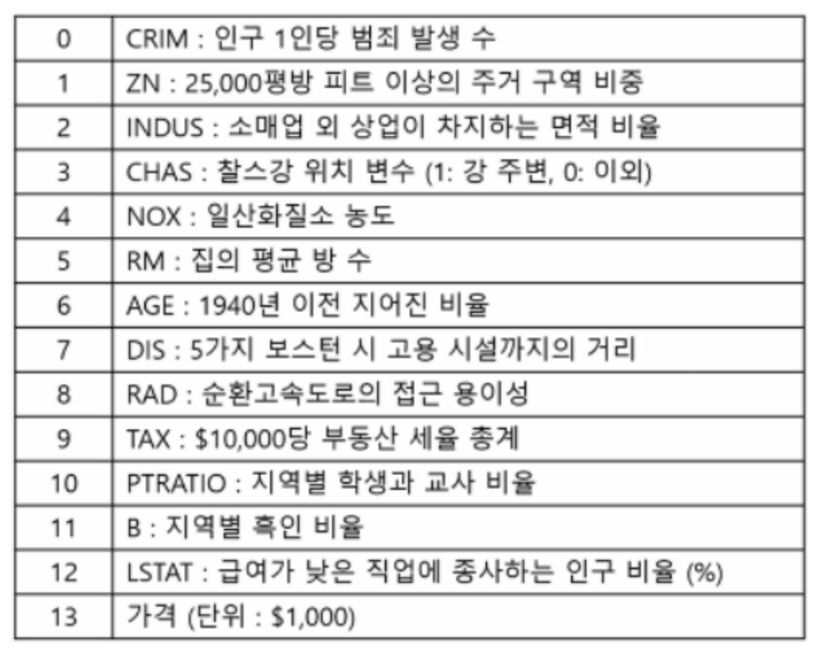

### 데이터 전처리
- sklearn에서 학습용으로 제공한 데이터이기 때문에 전처리 생략

#### 특성 확장
- 특성(문제)들끼리 곱해서 새로운 특성을 만들자

In [8]:
# X가 가지고있는 컬럼
col = X.columns

In [9]:
for i in range(col.size): # 전체 컬럼을 순서대로 꺼내오기
    for j in range(i, col.size):
        X[col[i] + '*' + col[j]] = X[col[i]] * X[col[j]]

In [10]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       ...
       'TAX*TAX', 'TAX*PTRATIO', 'TAX*B', 'TAX*LSTAT', 'PTRATIO*PTRATIO',
       'PTRATIO*B', 'PTRATIO*LSTAT', 'B*B', 'B*LSTAT', 'LSTAT*LSTAT'],
      dtype='object', length=104)

#### 데이터 스케일링
- 주의사항 : 데이터 전처리 마지막에 사용 ( 결측치가 없어야 함, 이상치는 있어도 됨)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
standard = StandardScaler()

In [13]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX*TAX,TAX*PTRATIO,TAX*B,TAX*LSTAT,PTRATIO*PTRATIO,PTRATIO*B,PTRATIO*LSTAT,B*B,B*LSTAT,LSTAT*LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,...,74529.0,5733.0,107013.27,2639.91,441.00,8231.790,203.070,153656.1601,3790.5433,93.5089
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,...,74529.0,5733.0,108353.70,2478.84,441.00,8334.900,190.680,157529.6100,3603.8520,82.4464
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,...,74529.0,5733.0,108353.70,1539.72,441.00,8334.900,118.440,157529.6100,2238.5160,31.8096
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,...,74529.0,5733.0,107411.85,1769.04,441.00,8262.450,136.080,154802.9025,2549.5560,41.9904


In [33]:
standard.fit(X)

StandardScaler()

In [38]:
# StandardScaler 기준으로 변환
X_trans = standard.transform(X)
X_trans

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.52632759,
        -0.88025024, -0.78952949],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.52632759,
        -0.24786578, -0.54045362],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.4494135 ,
        -1.03094709, -0.82582493],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.52632759,
        -0.77992002, -0.7598079 ],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.46107896,
        -0.66078951, -0.71663755],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.52632759,
        -0.43940531, -0.63138918]])

### 탐색적 데이터 분석 (EDA)

In [15]:
X.select_dtypes(include=['int64','float64']).corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,TAX*TAX,TAX*PTRATIO,TAX*B,TAX*LSTAT,PTRATIO*PTRATIO,PTRATIO*B,PTRATIO*LSTAT,B*B,B*LSTAT,LSTAT*LSTAT
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,...,0.598027,0.582420,0.224695,0.614364,0.297482,-0.255145,0.487671,-0.373019,0.193810,0.460510
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,...,-0.314988,-0.351212,-0.167503,-0.365627,-0.391015,-0.009200,-0.427244,0.190009,-0.318540,-0.323323
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,...,0.716358,0.712468,0.418263,0.684523,0.397995,-0.166550,0.618652,-0.387473,0.394627,0.532496
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,...,0.659892,0.627879,0.354314,0.669637,0.213950,-0.269935,0.564350,-0.411575,0.360822,0.530723
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,...,-0.281215,-0.320118,-0.191452,-0.485887,-0.354122,-0.040820,-0.601221,0.153303,-0.551717,-0.545322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTRATIO*B,-0.255145,-0.009200,-0.166550,-0.269935,-0.040820,-0.144490,0.174482,-0.231542,0.257110,0.902538,...,-0.229326,-0.156265,0.566177,-0.260748,0.248060,1.000000,-0.144300,0.886724,0.431927,-0.202717
PTRATIO*LSTAT,0.487671,-0.427244,0.618652,0.564350,-0.601221,0.598034,-0.502168,0.595724,0.515411,-0.377321,...,0.600361,0.633921,0.260543,0.910090,0.527001,-0.144300,1.000000,-0.389670,0.712103,0.941783
B*B,-0.373019,0.190009,-0.387473,-0.411575,0.153303,-0.298149,0.310875,-0.454398,-0.164726,0.983238,...,-0.454516,-0.435404,0.403643,-0.475349,-0.174738,0.886724,-0.389670,1.000000,0.285928,-0.355752
B*LSTAT,0.193810,-0.318540,0.394627,0.360822,-0.551717,0.444783,-0.321935,0.261539,0.255312,0.319943,...,0.256909,0.281901,0.559713,0.554384,0.262058,0.431927,0.712103,0.285928,1.000000,0.693112


#### 상관관계 분석
- 피어슨 상관계수 : 두 컬럼의 선형도 판단

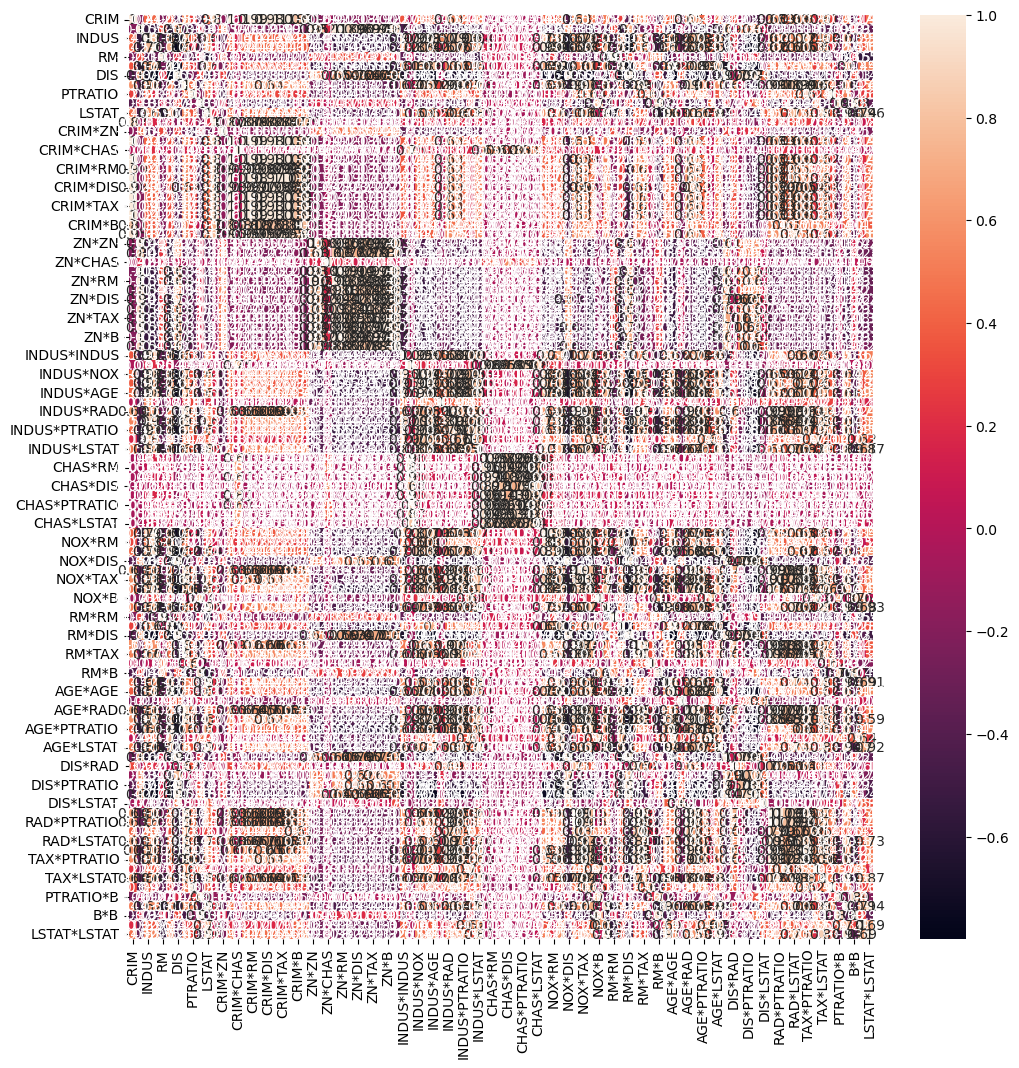

In [16]:
# 관계를 시각적으로 확인하기
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(X.select_dtypes(include=['int64','float64']).corr(), annot=True)
# annot = True : 수치값을 그래프 상에서 표현해주는 속성
plt.show()

# 절대값이 1에 가까울 수록 서로 영향을 많이 준다는 걸 의미

# heatmap() : 그래프로 시각적인 차이를 확인할 수있게 해주는 함수
# 1. 데이터를 전처리할 때 우선순위 판단을 하는 근거 확보 
# 2. 데이터를 줄일 때 - 가지고있는 컬럼들 중 상관도가 낮은 것을 삭제 
# 3. 추가적으로 전처리를 하는데 시간이 부족할 경우 - 상관도가 높은 것부터 전처리를 해줌

# 0 ~ 0.3 : 관계가 미미함.
# 0.3 ~ 0.7 : 적당히 관계가 있다.
# 0.7 ~ 1 : 아주 관계가 높다.

### 모델 선택 및 하이퍼 파라미터 튜닝

In [17]:
# 1. 수학적 공식을 적용한 해석적 모델
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

# 2. 경사하강법 모델
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor(eta0=0.0001)

#### 규제를 적용시킨 모델

In [18]:
from sklearn.linear_model import Ridge,Lasso

#### 훈련 평가 데이터 분리

In [39]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

# Scaler 적용
X_train, X_test, y_train, y_test = train_test_split(X_trans,y, test_size=0.3, random_state=10)

### 학습

In [40]:
lr_model.fit(X_train, y_train)
sgd_model.fit(X_train,y_train)

SGDRegressor(eta0=0.0001)

### 예측

In [21]:
# score : 회귀에서는 정확도가 아닌 모델의 성능 ==> R2 score
lr_model.score(X_train, y_train)

0.932728734954827

In [41]:
lr_model.score(X_test, y_test)

0.8737472733584004

In [42]:
sgd_model.score(X_train, y_train) # 학습율 eta0 = 0.01 기본값으로 발산

0.6407038513426316

In [43]:
sgd_model.score(X_test, y_test)

0.5571771240047241

- 선형모델(회귀)에서의 평가지표
    - 정량적인 지표가 중요
    - MSE : 0 ~ 무한대, 오차의 판단기준이 모호
    - R2 score : 분산을 기반으로 성능 예측, -1 ~ 1
        -  -1 : 모델을 잘 설명하지 못함
        - 1 : 모델을 잘 설명함

#### Ridge 활용하기

In [44]:
# RIdge의 하이퍼 파라미터 튜닝
def ridge_alpha(alpha):
    ridge = Ridge(alpha=alpha) # alpha 기본값 1.0
                               # 일반적으로 사용하는 구간 : 0.001 ~ 1000
    ridge.fit(X_train, y_train)
    print('train_score : ', ridge.score(X_train,y_train))
    print('test_score : ', ridge.score(X_test,y_test))

In [45]:
ridge_alpha(0.001)
# alpha 값을 변경해가면서 값 확인
# test_score가 가장 높은 순간 확인

# alpha 기본 값 = 1
# alpha 값이 증가 = 규제를 늘리겠다 -> 모델의 복잡도를 낮춘다.(과대적합일때 사용)
# alpha 값이 감소 = 규제를 줄리겠다 -> 모델의 복잡도를 높힌다.(과소적합일때 사용)

train_score :  0.9325484004214122
test_score :  0.8738440716742444


- Ridge 정리
    - 규제를 줄이니 test_score가 상승
    - 과대적합보다는 과소적합 또는 일반화에 가까운 상황
    - 전체 데이터가 골고루 중요할 때 사용

#### Lasso 활용하기

In [27]:
import numpy as np

In [28]:
# Lasso의 하이퍼 파라미터 튜닝
def Lasso_alpha(alpha):
    lasso = Lasso(alpha=alpha) # alpha 기본값 1.0
                               # 일반적으로 사용하는 구간 : 0.001 ~ 1000
    lasso.fit(X_train, y_train)
    print('train_score : ', lasso.score(X_train,y_train))
    print('test_score : ', lasso.score(X_test,y_test))
    
    # 사용한 특성의 수 확인하기
    print('사용한 특성 수 : ', np.sum(lasso.coef_ != 0))

In [29]:
# lasso.coef_ : lasso가 학습한 후 전체 데이터 특성들의 가중치값을 출력

# np.sum(lasso.coef_ != 0) : 사용되지 않은 특성은 제외하고 모두 더해서 출력


In [30]:
Lasso_alpha(1)

#규제를 늘릴수록 값(test_score)이 잘 안나옴
#규제를 줄일수록 값(test_score)이 잘 나옴
# 규제 값을 변경하면서 사용된 특성의 수도 확인

train_score :  0.8839981825102611
test_score :  0.8070964153467313
사용한 특성 수 :  55


- Lasso 정리
    - 규제를 적용할 수록 test_score 값이 낮아짐, 특성의 수도 감소
    - 특정 데이터가 중요할 때 사용